In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

# Step 2: Load and Normalize Column Names
def load_and_clean_csv(filename):
    df = pd.read_csv(filename)
    df.columns = df.columns.str.lower().str.strip()  # lowercase & strip spaces
    return df

train = load_and_clean_csv('train.csv')
test = load_and_clean_csv('test.csv')
features = load_and_clean_csv('features.csv')
stores = load_and_clean_csv('stores.csv')

# Step 3: Rename 'isholiday' to 'is_holiday'
for df in [train, test, features]:
    if 'isholiday' in df.columns:
        df.rename(columns={'isholiday': 'is_holiday'}, inplace=True)

# Step 4: Convert 'date' column to datetime
for df in [train, test, features]:
    df['date'] = pd.to_datetime(df['date'])

# Step 5: Merge datasets
train_merged = pd.merge(train, features, on=['store', 'date', 'is_holiday'], how='left')
test_merged = pd.merge(test, features, on=['store', 'date', 'is_holiday'], how='left')

train_merged = pd.merge(train_merged, stores, on='store', how='left')
test_merged = pd.merge(test_merged, stores, on='store', how='left')

# Step 6: Sort and Reset Index
train_merged.sort_values(by=['store', 'dept', 'date'], inplace=True)
test_merged.sort_values(by=['store', 'dept', 'date'], inplace=True)

train_merged.reset_index(drop=True, inplace=True)
test_merged.reset_index(drop=True, inplace=True)



In [3]:
# Fill missing markdowns with 0
for col in ['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']:
    train_merged[col] = train_merged[col].fillna(0)



In [4]:
for col in ['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']:
    test_merged[col] = test_merged[col].fillna(0)


# Analyze Monthly Sales

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\918615458.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = train_merged.groupby(pd.Grouper(key='date', freq='M'))['weekly_sales'].sum()
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\918615458.py:13: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


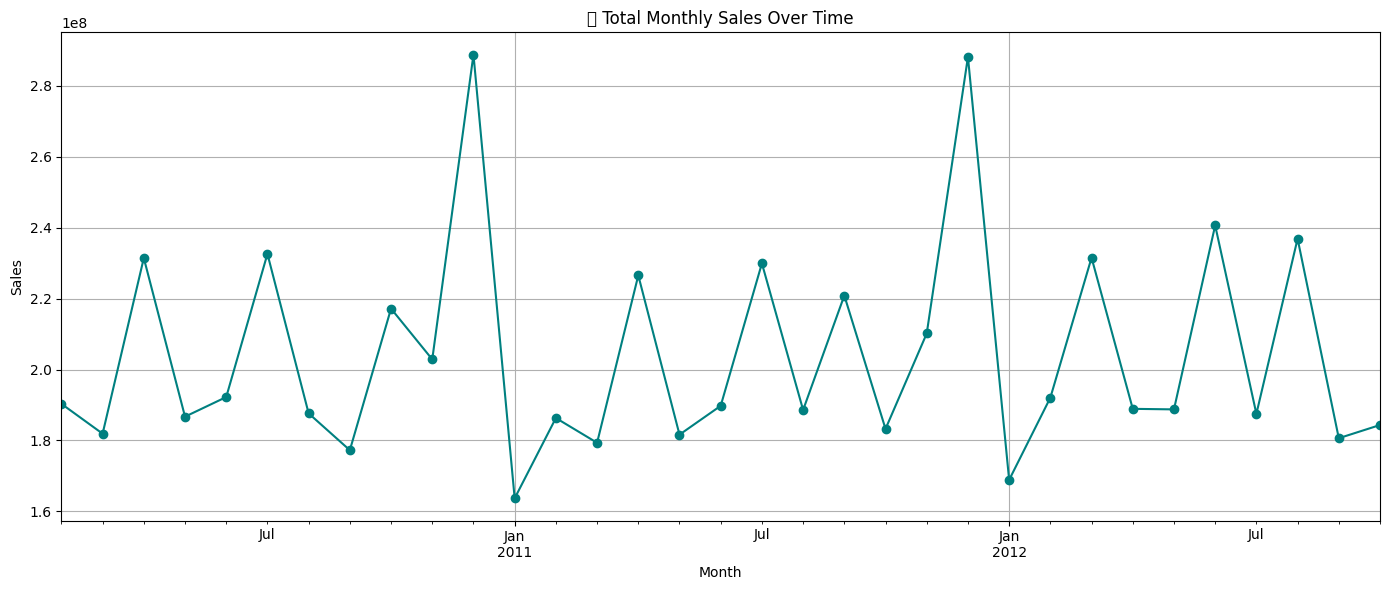

In [10]:
# Step 1: Aggregate weekly sales into monthly sales
monthly_sales = train_merged.groupby(pd.Grouper(key='date', freq='M'))['weekly_sales'].sum()

# Step 2: Plot total monthly sales
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
monthly_sales.plot(marker='o', color='teal')
plt.title('🛒 Total Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot Trends, Moving Averages, and Seasonal Patterns

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\324019709.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


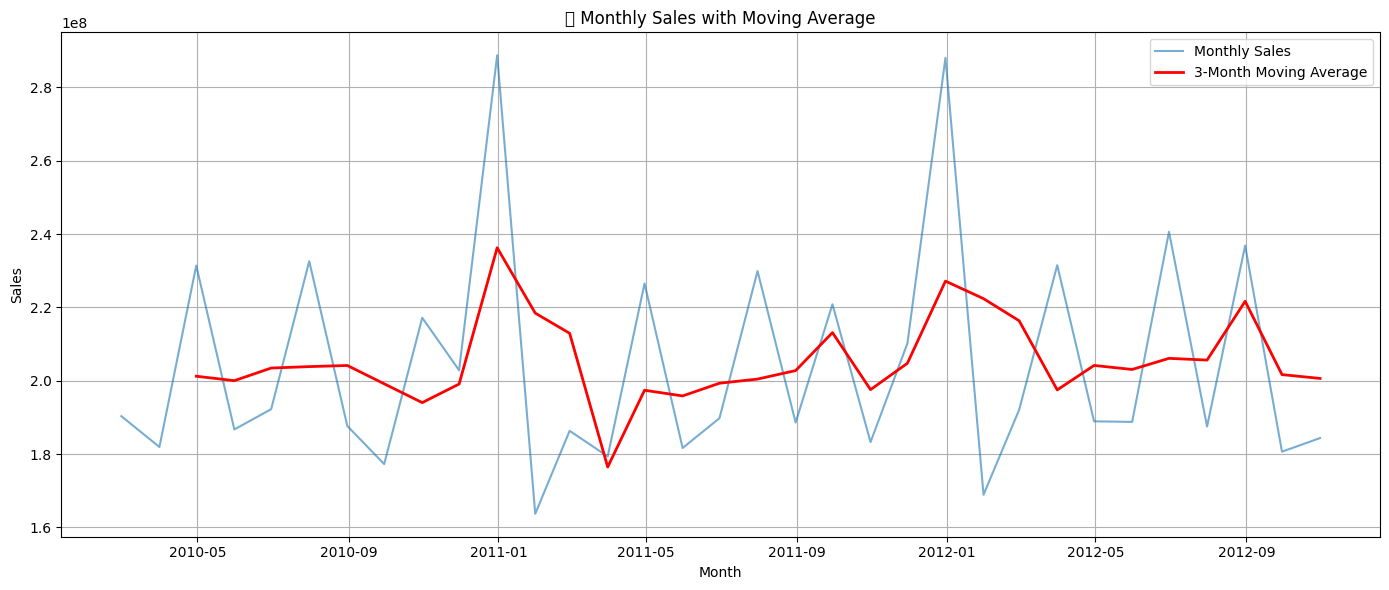

In [12]:
# 3-month moving average
ma3 = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_sales, label='Monthly Sales', alpha=0.6)
plt.plot(ma3, label='3-Month Moving Average', color='red', linewidth=2)
plt.title('📊 Monthly Sales with Moving Average')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\3069647975.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = monthly_sales.asfreq('M')
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\3069647975.py:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


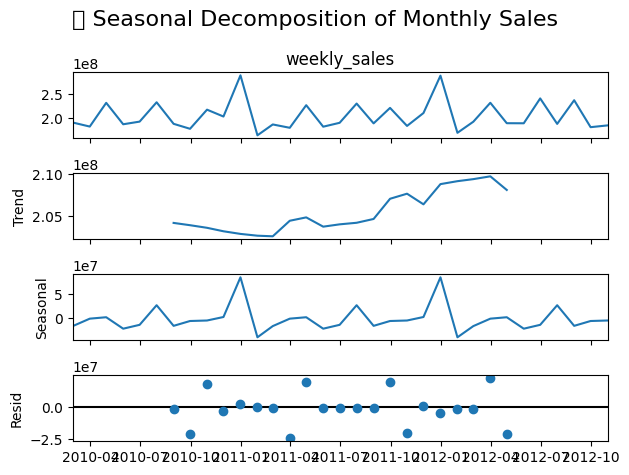

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure datetime frequency is monthly
monthly_sales = monthly_sales.asfreq('M')

# Decompose the time series
decomp = seasonal_decompose(monthly_sales, model='additive')

# Plot components
decomp.plot()
plt.suptitle('🔍 Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()

# Revenue by Product and Region Over Time

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\740871387.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dept_sales = train_merged.groupby([pd.Grouper(key='date', freq='M'), 'dept'])['weekly_sales'].sum().reset_index()
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\740871387.py:13: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


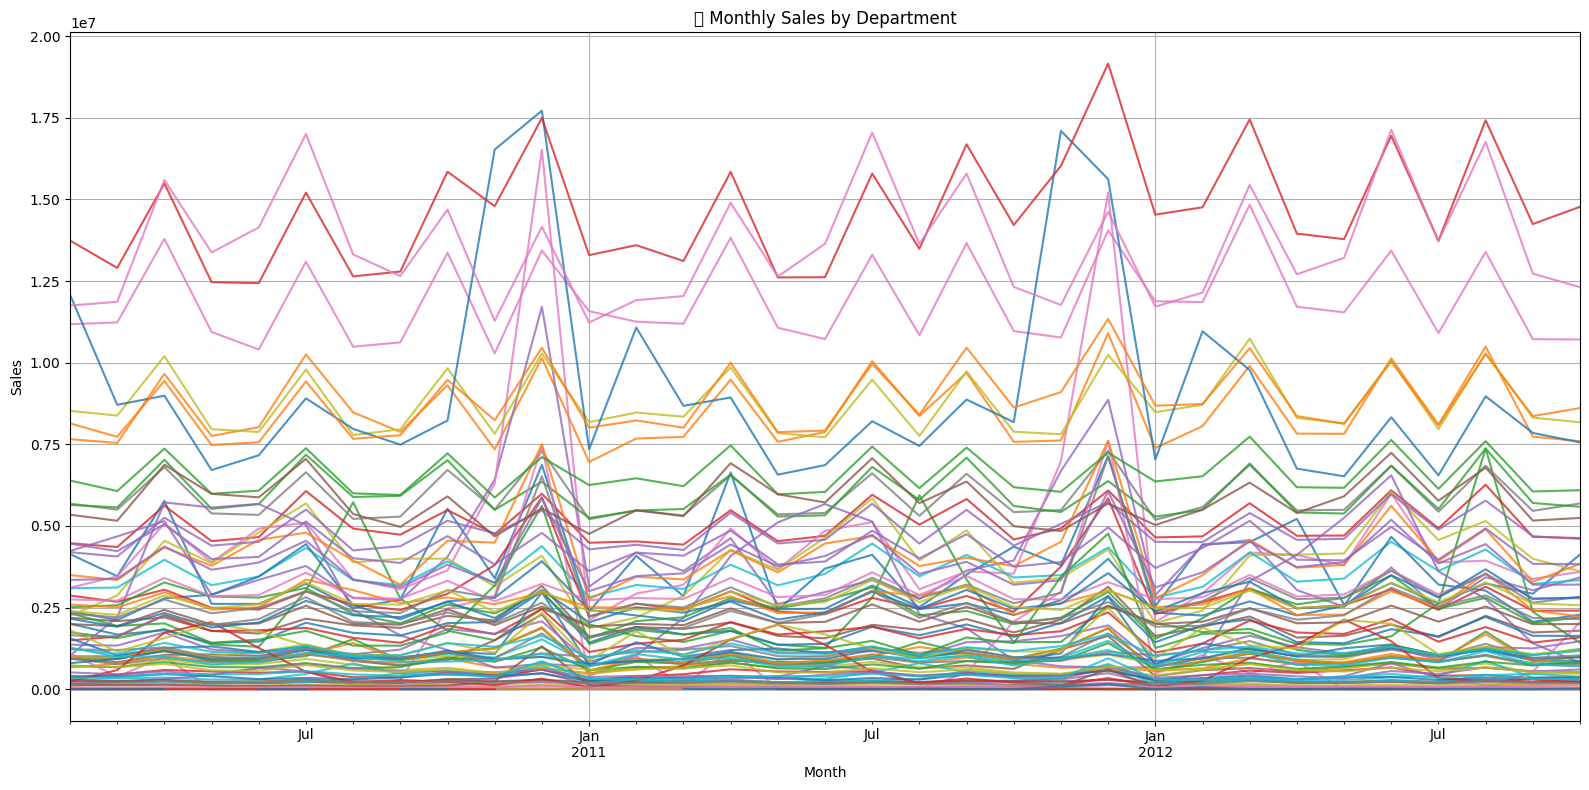

In [14]:
# Monthly sales by department
dept_sales = train_merged.groupby([pd.Grouper(key='date', freq='M'), 'dept'])['weekly_sales'].sum().reset_index()

# Pivot to wide format
pivot_dept = dept_sales.pivot(index='date', columns='dept', values='weekly_sales')

# Plot department breakdown
pivot_dept.plot(figsize=(16,8), alpha=0.8, legend=False)
plt.title('📦 Monthly Sales by Department')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\144926961.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = train_merged.groupby([pd.Grouper(key='date', freq='M'), 'store'])['weekly_sales'].sum().reset_index()


NameError: name 'plt' is not defined

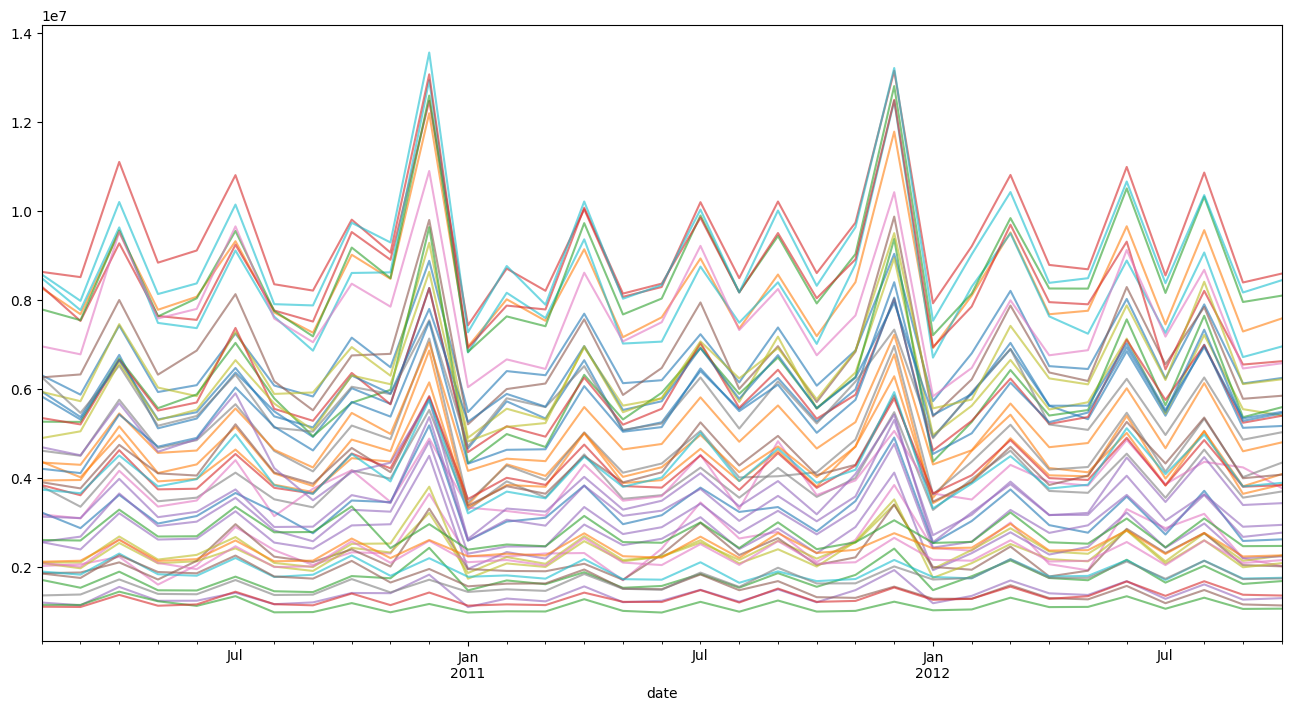

In [6]:
# Monthly sales by store
store_sales = train_merged.groupby([pd.Grouper(key='date', freq='M'), 'store'])['weekly_sales'].sum().reset_index()

# Pivot to wide format
pivot_store = store_sales.pivot(index='date', columns='store', values='weekly_sales')

# Plot store breakdown
pivot_store.plot(figsize=(16,8), alpha=0.6, legend=False)
plt.title('🏬 Monthly Sales by Store')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Add Simple Forecasting

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14480\1311204525.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


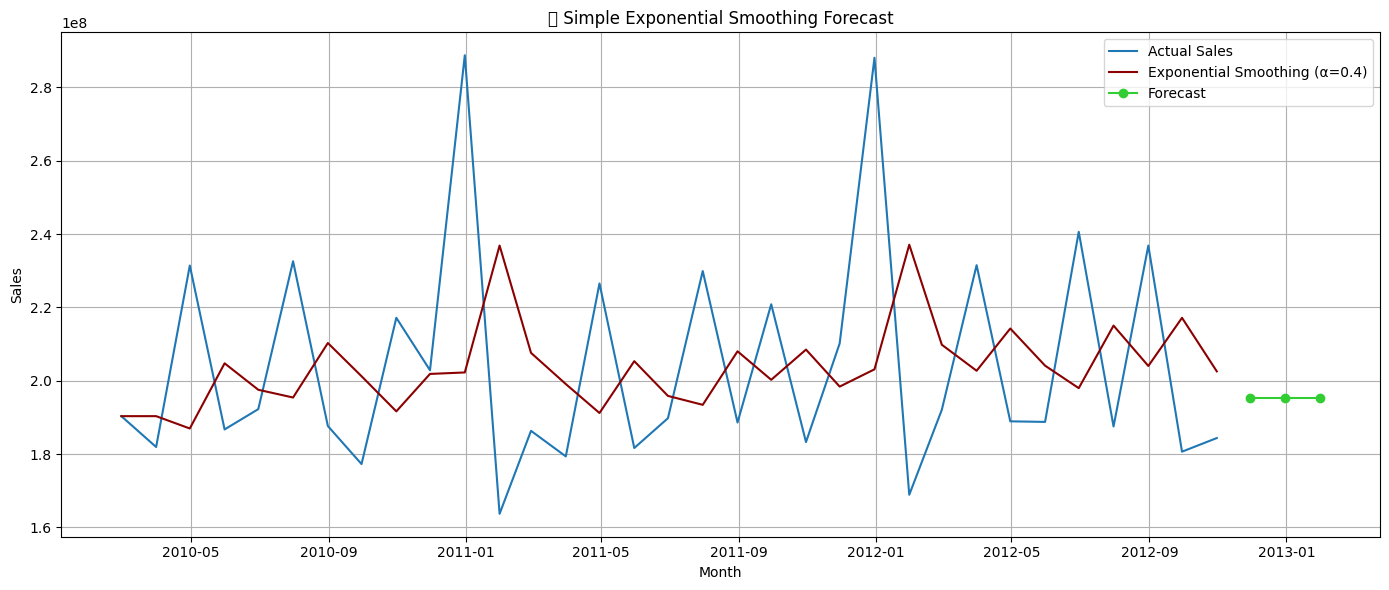

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit exponential smoothing model
model = SimpleExpSmoothing(monthly_sales.dropna()).fit(smoothing_level=0.4, optimized=False)

# Forecast next 3 months
forecast = model.forecast(3)

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(model.fittedvalues, label='Exponential Smoothing (α=0.4)', color='darkred')
plt.plot(forecast, label='Forecast', color='limegreen', marker='o')
plt.title('📈 Simple Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
